1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);
2. compute and display the angle and momentum components distributions of the emerging muon pairs;
3. boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;
4. write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; 
5. produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);
6. assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;
7. repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;
8. given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;
9. (optional) take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import alpha, pi
from scipy.interpolate import interp1d
from typing import Tuple

np.random.seed(13)

## 1. Compute the process leading-order cross section, $\sigma(\theta; \sqrt{s})$, as a function of the scattering angle $\theta$ and with the  center of mass energy $\sqrt{s}$ as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for $\sqrt{s}\gg m_\mu$, which is clearly not the case here ($\sqrt{s}\sim 2m_\mu$);

The process we are going to simulate is:

$$ e^+ + e^- \rightarrow \mu^+ + \mu^- $$

The process simulation deals with energies that, in the center of mass (CoM) frame of reference are of the order of $ \sqrt{s} \simeq 2m_{\mu} $. This implies that the only relevant interaction that the electron/positron pair undergoes is electromagnetic, as weak interactions start becoming relevant for energies of around 30 GeV. <br>
A Feynman diagram of the process can be seen below:

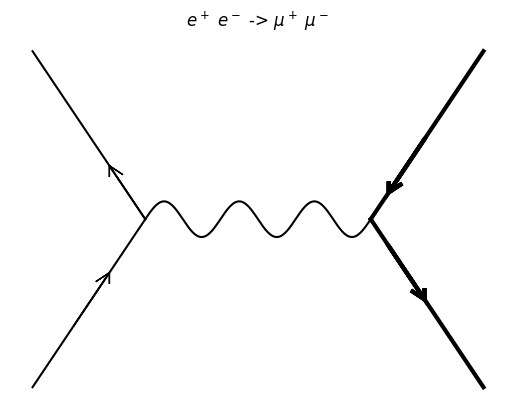

In [6]:
# Let's draw the Feynman diagram of the process we are interested in. Remember that, due to low energy regime,
# weak interactions can be safely neglected
def incoming_electronic_legs(x: np.array) -> Tuple[(np.array, np.array)]:
    A = -3
    B = 3
    return A * x, B * x

def outgoing_muonic_legs(x: np.array) -> Tuple[(np.array, np.array)]:
    A = 3
    B = -3
    w = - 3 * pi
    return A * x + w, B * x - w
    
electron_domain = np.linspace(-pi / 2, 0, 100)
photon_domain = np.linspace(0, pi, 200)
muon_domain = np.linspace(pi, 3 * pi / 2, 100)

incoming_e_plus, incoming_e_minus = incoming_electronic_legs(electron_domain)
e_plus_arrow, _ = incoming_electronic_legs(0)
_, e_minus_arrow = incoming_electronic_legs(-1)

photon_propagator = 0.5 * np.sin(6 * photon_domain)

outgoing_mu_plus, outgoing_mu_minus = outgoing_muonic_legs(muon_domain)
mu_plus_arrow, _ = outgoing_muonic_legs(pi + 0.75)
_, mu_minus_arrow = outgoing_muonic_legs(pi + 0.25)

plt.figure()
plt.title('$e^+$ $e^-$ -> $\mu^+$ $\mu^-$')

plt.plot(electron_domain, incoming_e_plus, color = 'black')
plt.arrow(0, e_plus_arrow, -0.5, 1.5, shape = 'full', length_includes_head=True, overhang = 1, 
          head_width=.2, color = 'black')
plt.arrow(-1, e_minus_arrow, 0.5, 1.5, shape = 'full', length_includes_head=True, overhang = 1, 
          head_width=.2, color = 'black')
plt.plot(electron_domain, incoming_e_minus, color = 'black')

plt.plot(photon_domain, photon_propagator, color = 'black')

plt.plot(muon_domain, outgoing_mu_plus, color = 'black', linewidth = 3)
plt.arrow(pi + 0.75, mu_plus_arrow, -0.5, -1.5, shape = 'full', length_includes_head=True, 
          overhang = 1, head_width=.2, color = 'black', linewidth = 3)
plt.plot(muon_domain, outgoing_mu_minus, color = 'black', linewidth = 3)
plt.arrow(pi + 0.25, mu_minus_arrow, 0.5, - 1.5, shape = 'full', length_includes_head=True, 
          overhang = 1, head_width=.2, color = 'black', linewidth = 3)
plt.axis('off')
plt.show()

The first step is to compute the cross section. We have to compute both the differential and total cross sections.
The differential cross section can be computes as follows:

$$ \frac{d\sigma}{d\Omega} = \frac{\alpha^2}{4s} \bigg(1 - \frac{4m_{\mu}^2}{s} \bigg)^{1/2} \bigg(1 - \frac{4m_{e}^2}{s} \bigg)^{-1/2} \bigg[ 1 + \frac{4}{s} \big(m_e^2 + m_{\mu}^2 \big) + \bigg(1 - \frac{4 m_{\mu}^2}{s} \bigg) \bigg(1 - \frac{4 m_e ^2}{s} \bigg) cos^2(\theta) \bigg] $$

Where with $\alpha$ we defined the fine structure constant and with $s$ the total energy in CoM frame squared. <br>
Afterwards, we computed the total cross section, which is simply defined as:

$$ \sigma = \int^{}_{4\pi} \frac{d\sigma}{d\Omega} \,d\Omega $$

Therefore, upon an integration, one obtains the following equation:

$$ \sigma = \frac{4 \pi \alpha^2}{3 s^3}  \bigg(1 - \frac{4m_{\mu}^2}{s} \bigg)^{1/2} \bigg(1 - \frac{4m_{e}^2}{s} \bigg)^{-1/2} \big(2 m_e^2 + s \big) \big( 2 m_{\mu}^2 + s \big)$$

In [7]:
# Masses of the particles (in MeV)
m_e = 0.51099895000
m_mu = 105.6583755

# Squared masses (in MeV^2, useful for calculations)
e2 = m_e**2
mu2 = m_mu**2

def diff_X_sec(ECM: float, theta: float) -> float:
    '''
    This function computes the differential cross section starting from the energy of the center of mass
    (generally represented as sqrt(s)) and the angle theta. 
    The cross section computed here is returned in natural units (i.e.: MeV**-2)
    Parameters:
    * ECM: energy of the center of mass
    * theta: scattering angle
    '''
    s = ECM ** 2
    prefactor = alpha**2 / (4 * s)
    ratio = np.sqrt(1 - (4 * mu2 / s))/np.sqrt(1 - (4 * e2 / s)) 
    term = 1 + 4 / s * (e2 + mu2) + ((1 - 4 * mu2 / s) * (1 - 4 * e2 / s) * (np.cos(theta) ** 2))
    diff_X = prefactor * ratio * term
    return diff_X

def total_X_sec(ECM: float) -> float:
    '''
    This function computes the total cross section starting from a given value of the energy of the center of
    mass.
    Again, the results computed here are returned in natural units (i.e.: MeV**-2)
    Parameter:
    * ECM: energy of the center of mass
    '''
    s = ECM ** 2
    prefactor = 4 * pi * alpha ** 2 / (3 * s ** 3)
    ratio = np.sqrt(1 - 4 * mu2 / s) / np.sqrt(1 - 4 * e2 / s)
    term = (2 * e2 + s) * (2 * mu2 + s)
    total_X = prefactor * ratio * term
    return total_X

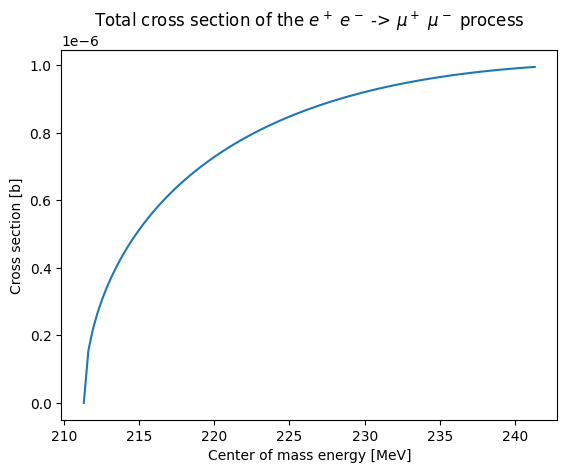

In [38]:
# Plotting the total cross section vs. energy
# Defining an energy domain over which compute the cross section
# The energy in this case is ECM, so it should be slightly above 2 * muon mass
e_domain = np.linspace(2 * m_mu, 2 * m_mu + 30, 100)

X_secs = []
for energy in e_domain:
    X_secs.append(total_X_sec(energy))

X_secs = np.array(X_secs)

# Perhaps plotting the cross section in barns instead of MeV might be more common. Therefore, we define a
# conversion factor, remembering how 1 barn = 0.00257 MeV^-2
conv = 0.00257

X_secs = X_secs / conv

# Plotting the total cross section
plt.figure()
plt.title('Total cross section of the $e^+$ $e^-$ -> $\mu^+$ $\mu^-$ process')
plt.plot(e_domain, X_secs)
plt.xlabel('Center of mass energy [MeV]')
plt.ylabel('Cross section [b]')
plt.show()

## 2. Compute and display the angle and momentum components distributions of the emerging muon pairs;


Now, we have to compute and display the angular and momentum distributions of the emerging muons. <br>
We assume the angle $ \varphi $ to be uniformly distributed in $ [0, 2\pi] $. <br>
In order to obtain the probabilty distribution of the angle $\theta$ on the other hand, we perform a little trick, which is the normalization of the definition of the cross section:

$$
\sigma = \int^{}_{4\pi} \frac{d\sigma}{d\Omega} \,d\Omega \\
1 = \int^{}_{4\pi} \frac{1}{\sigma} \frac{d\sigma}{d\Omega} \,d\Omega
$$

Therefore, we can consider the integrand function $ \frac{1}{\sigma} \frac{d\sigma}{d\Omega}$ to be the probability distribution for $\theta$

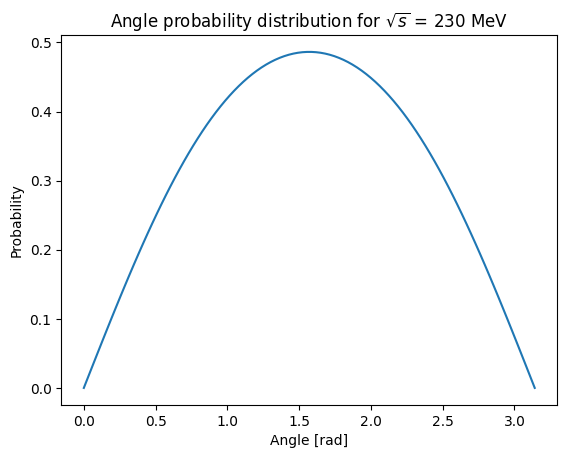

In [9]:
theta_domain = np.linspace(0, pi, 100)
fix_E = 230

def angle_probability(ECM: float, theta: float) -> float:
    '''
    This function evaluates the probability of the emerging muon pair's angle,
    given the energy in the center of mass frame of reference.
    Parameters:
    * ECM: energy in the center of mass
    * theta: angle
    '''
    return 2 * pi * np.sin(theta) / total_X_sec(ECM) * diff_X_sec(ECM, theta)

probs = []
for theta in theta_domain:
    probs.append(angle_probability(fix_E, theta))
    
probs = np.array(probs)

# Plotting the angle distribution at a fixed energy fix_E = 230 MeV
plt.figure()
plt.title('Angle probability distribution for $\sqrt{s}$ = 230 MeV')
plt.plot(theta_domain, probs)
plt.xlabel('Angle [rad]')
plt.ylabel('Probability')
plt.show()

Now, we have to generate a set of scattering angles that behave accordingly to the probability density function we just found and computed. <br>
We decided to use the inverse cumulative function method, which consists in computing the cumulative distribution, finding its inverse (the quantile function), and then, starting from a series of variables uniformly sampled in $ [0, 1] $, we compute the angle.
<br>
Instead of calculating the distributions analytically, we computed a numerical estimation of them. 

In [10]:
# Let's check if the PDF we computed is normalized at 1 by using a simple Monte Carlo integration routine
N = 10000
hits = 0
for i in range(N):
    x = pi * np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    if angle_probability(fix_E, x) > y: hits += 1

intg = hits * pi / N
print('Integral of the probability distribution of the angle:', intg)

Integral of the probability distribution of the angle: 0.9770353152664256


In [11]:
# In order to obtain a set of angles distributed according to the pdf we computed, we can use the inverse
# transform method.
def cumulative_distr(ECM: float, theta_values: np.array) -> np.array:
    '''
    This function computes the cdf of the angular distribution.
    Parameters:
    * ECM: total energy in the center of mass frame
    * theta_values: an array containing values of theta. It should run between 0 and pi
    '''
    pdf_values = [angle_probability(ECM, theta) for theta in theta_values]
    cdf_values = np.cumsum(pdf_values)
    cdf_values /= cdf_values[-1]
    return cdf_values

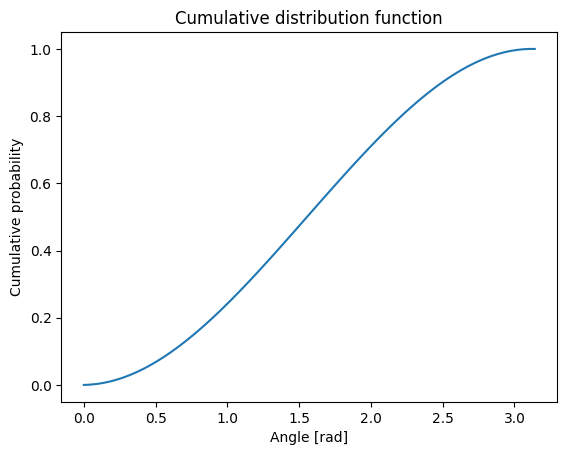

In [12]:
# Let's see if the cumulative distribution is actually sound
distribution = cumulative_distr(fix_E, theta_domain)

plt.figure()
plt.title('Cumulative distribution function')
plt.plot(theta_domain, distribution)
plt.xlabel('Angle [rad]')
plt.ylabel('Cumulative probability')
plt.show()

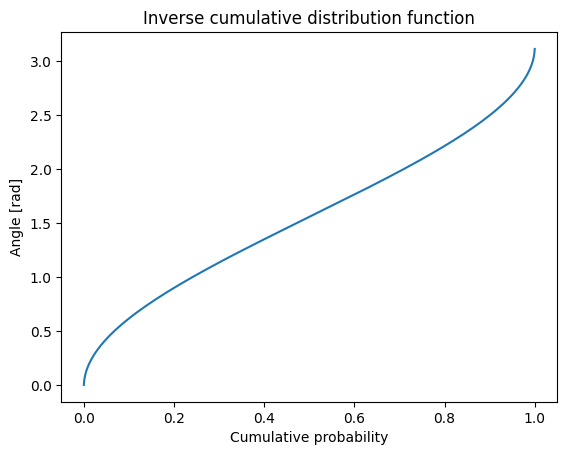

In [13]:
inverse_cdf = interp1d(distribution, theta_domain, kind = 'linear', bounds_error = False, fill_value = 'extrapolate')
plt.figure()
plt.title('Inverse cumulative distribution function')
plt.plot(np.linspace(0, 1, 1000), inverse_cdf(np.linspace(0, 1, 1000)))
plt.xlabel('Cumulative probability')
plt.ylabel('Angle [rad]')
plt.show()

Using the inverse cumulative distribution function plotted above we will generate a distribution of events that simulate scattering angles and then plot our findings - both the estimated and simulated results.

In [14]:
# With the icdf method, we can generate a large amount of scattering angles and see if they follow
# the expected distribution
def generateTheta(N: int, ECM: float) -> np.array:
    '''
    This function generates a series of events using the icdf method. It uses the cumulative_distr function
    previously defined.
    Parameters:
    * N: number of events we want to generate
    * ECM: energy of the center of mass
    '''
    theta = np.linspace(0, pi, 100)
    CDF = cumulative_distr(ECM, theta)
    predictor = interp1d(CDF, theta, kind = 'linear')
    out = []
    for x in np.random.uniform(min(CDF), max(CDF), N):
        out.append(float(predictor(x)))
    out = np.array(out)
    return out

samples = int(1e5)

simul1 = generateTheta(samples, fix_E)

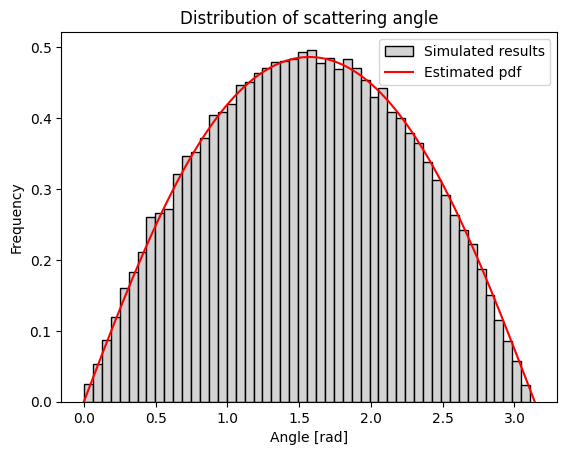

In [15]:
# Plotting the results
plt.figure()
plt.title('Distribution of scattering angle')
plt.hist(np.sort(simul1), bins = 50, color = 'lightgray', label = 'Simulated results', density = True, 
         edgecolor = 'black')
plt.plot(theta_domain, probs, color = 'red', label = 'Estimated pdf')
plt.xlabel('Angle [rad]')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()

### Comparison of inverse sampling data with Babayaga output


BabaYaga is a Monte Carlo event generator for $e^+$ $e^-$ --> $e^+$ $e^-$, $\mu^+$ $\mu^-$, $\gamma$ $\gamma$ and $\pi^+$ $\pi^-$ processes at flavour factories, i.e. for energies below 10-12 GeV, it has been developed at the INFN center of Pavia by C.M. Carloni Calame, G. Montagna, O. Nicrosini, F. Piccinini.

In [39]:
baba_yaga_data = np.loadtxt("matched_el_th_exp_200.txt")
baba_yaga_data[:, 0] = baba_yaga_data[:, 0] / 180 * np.pi
baba_yaga_data

array([[-1.74532925e-03,  3.08208040e-02,  3.71261241e-03],
       [ 1.39800873e-02,  1.14502447e-01,  7.45392540e-03],
       [ 2.97055039e-02,  2.30611818e-01,  1.08333365e-02],
       [ 4.54309204e-02,  3.21953163e-01,  1.29897318e-02],
       [ 6.11563370e-02,  4.24556055e-01,  1.51185675e-02],
       [ 7.68817536e-02,  5.48381899e-01,  2.35348510e-02],
       [ 9.26071701e-02,  6.83829506e-01,  2.11000305e-02],
       [ 1.08332587e-01,  8.56248964e-01,  4.90065945e-02],
       [ 1.24058003e-01,  9.54294574e-01,  4.16849052e-02],
       [ 1.39783420e-01,  1.14811679e+00,  4.15182402e-02],
       [ 1.55508836e-01,  1.36494706e+00,  5.12497327e-02],
       [ 1.71234253e-01,  1.47595107e+00,  5.56586275e-02],
       [ 1.86959669e-01,  1.61756551e+00,  6.14289981e-02],
       [ 2.02685086e-01,  1.67252012e+00,  4.32329359e-02],
       [ 2.18410503e-01,  1.84558781e+00,  4.86107947e-02],
       [ 2.34135919e-01,  1.98592850e+00,  6.03486771e-02],
       [ 2.49861336e-01,  2.20854070e+00

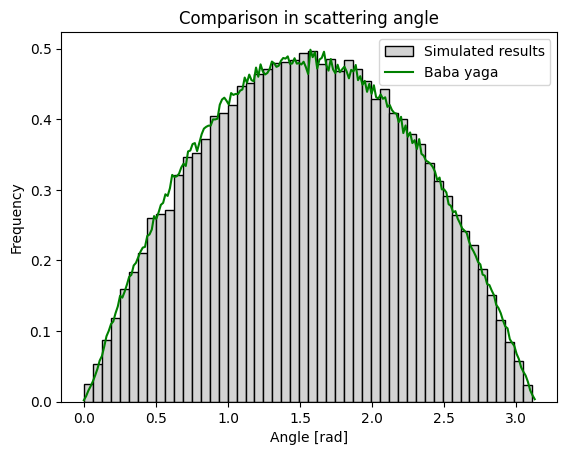

In [51]:
plt.figure()
plt.title('Comparison in scattering angle')
plt.hist(np.sort(simul1), bins = 50, color = 'lightgray', label = 'Simulated results', density = True, 
         edgecolor = 'black')
plt.plot(baba_yaga_data[:, 0], baba_yaga_data[:, 1] / (np.mean(baba_yaga_data[:, 1]) * np.pi),color= 'green', linewidth=1.5, label="Baba yaga")
plt.xlabel('Angle [rad]')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()

Starting from the angular distribution we just computed, we can also display the distribution of the components of the momenta. In fact, remembering the energy-mass-momentum relation from special relativity

$$ E^2 = p^2 + m^2 $$

It is possible to easily invert it and retrieve the modulus of the momentum starting from the energy. Computing the momentum components is then easy, since they obey the following equations:
$$
    p_x = p \sin({\theta}) \cos({\varphi}) \\
    p_y = p \sin({\theta}) \sin({\varphi}) \\
    p_z = p \cos({\theta})
$$

Text(0, 0.5, 'Frequency')

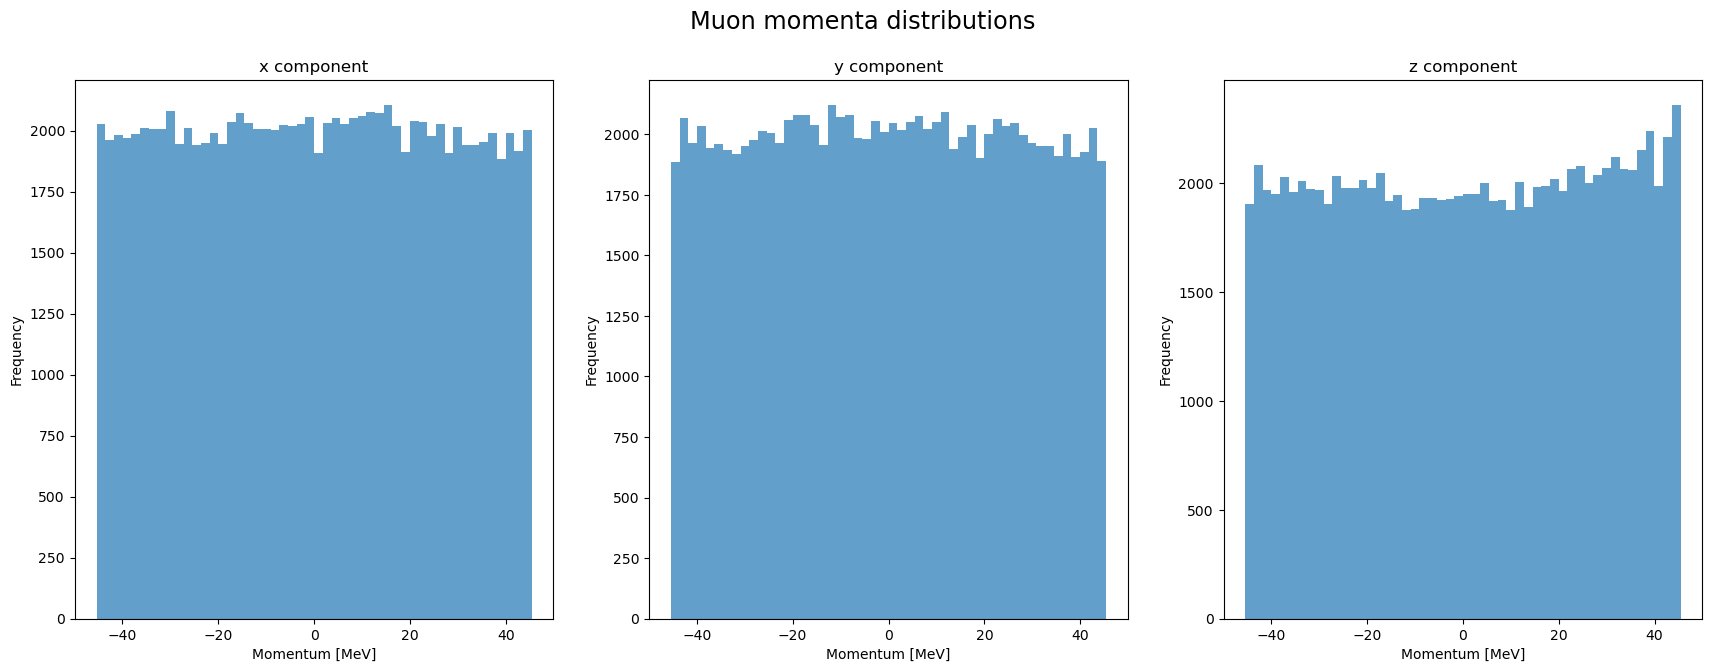

In [12]:
# Now we have to compute the distribution of momentum components.
# Remembering the energy-mass-momentum relation (in natural units, p = sqrt(E2 - m2)), we compute
# the modulus of the momentum given the energy. Then we will have to project that modulus into the three
# space directions x, y, and z, assuming a uniform distribution over the angle phi

momentum = np.sqrt((fix_E / 2) ** 2 - (m_mu**2))

N = int(1e5)
phi_values = np.random.uniform(0, 2 * pi, N)
theta_values = generateTheta(N, fix_E)

p_x = momentum * np.sin(theta_values) * np.cos(phi_values)
p_y = momentum * np.sin(theta_values) * np.sin(phi_values)
p_z = momentum * np.cos(theta_values)

# Now, let's plot the three distributions
fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon momenta distributions', size = 'xx-large')

ax[0].hist(np.sort(p_x), bins = 50, alpha = .7)
ax[0].set_title('x component')
ax[0].set_xlabel('Momentum [MeV]')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(p_y), bins = 50, alpha = .7)
ax[1].set_title('y component')
ax[1].set_xlabel('Momentum [MeV]')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(p_z), bins = 50, alpha = .7)
ax[2].set_title('z component')
ax[2].set_xlabel('Momentum [MeV]')
ax[2].set_ylabel('Frequency')

Expected total momentum: 45.401626476382965 MeV


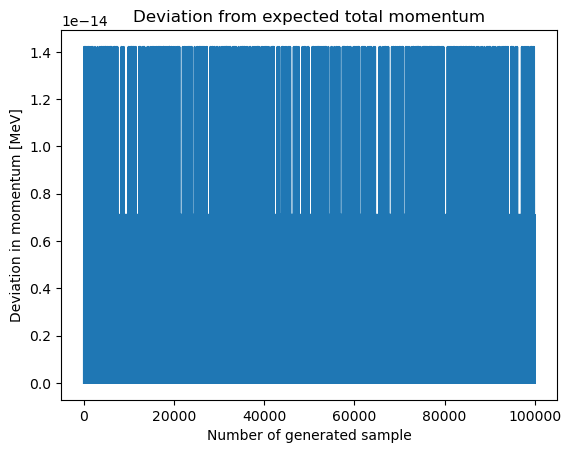

In [13]:
# Let's also verify that the three components are all on-shell
tot_p = np.sqrt((p_x ** 2) + (p_y ** 2) + (p_z ** 2))

print('Expected total momentum: {} MeV'.format(momentum))

plt.figure()
plt.title('Deviation from expected total momentum')
plt.plot(np.arange(N), np.abs(momentum - tot_p))
plt.xlabel('Number of generated sample')
plt.ylabel('Deviation in momentum [MeV]')
plt.show()

## 3. Boost muons four-momenta in the laboratory frame, i.e. in the frame where the electron is at rest and the positron has enough energy to give rise to the process;

So far we have been working in the centre-of-mass frame, where the total momentum of the interacting particles is zero. This is useful mathematically, but in practice our measurements will be done in the laboratory frame where the detectors are instead stationary. To compare our simulated results with what we would expect to see in an experimental setting we must perform a **Lorentz boost** to the frame.

The boost is applied using the gamma factor:

$$
\gamma \simeq \frac{\sqrt{s}}{2m_{e}}
$$

We apply this boost to both the time and the z-components of the muons 4-momenta to find the momentum in the laboratory frame as well as the time at which they occurred. 

In [14]:
gamma = fix_E / (2 * m_e)
v = np.sqrt(1 - 1/gamma ** 2)

print('Velocity (natural units):', v)
print('Gamma:', gamma)

Velocity (natural units): 0.9999901277423128
Gamma: 225.0493861093061


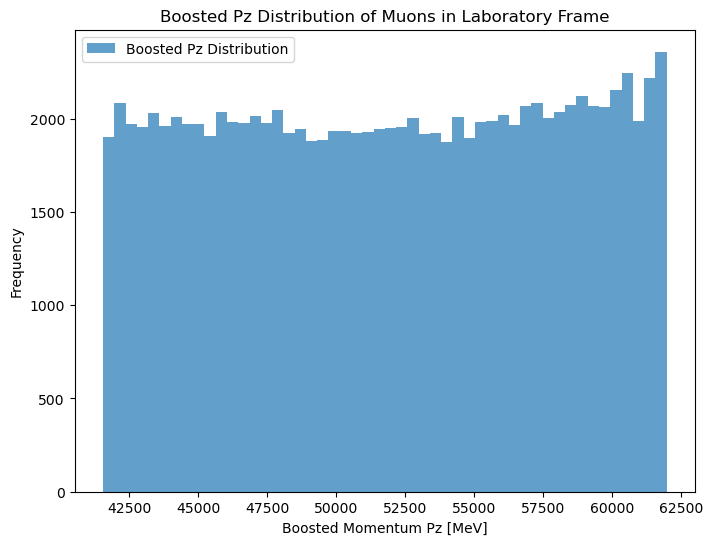

(225.0493861093061, 0.9999901277423128)

In [15]:
def lorentz_boost(E: float, px: float, py: float, pz: float, gamma: float) -> np.array:
    '''
    Computes Lorentz-transformed variables using the expressions contained in [3], as well as the velocity
    (in natural units)
    Parameters:
    * E: energy
    * px, py: 1st and 2nd component of the momentum 3-vector. By design of the experiment, they're the x and y
              components. They are not changed in the Lorentz transformation, but they are included in this
              function just to make it simpler due to the way arrays are formatted
    * pz: 3rd component of the momentum 3-vector. By design of the experiment, it's the z component and it's the
          only one that is changed by the Lorentz transformation
    * gamma: Lorentz gamma parameter
    '''
    v = np.sqrt(1 - 1 / gamma ** 2)
    E_prime = gamma * (E + pz * v)
    pz_prime = gamma * (pz + E * v)
    return E_prime, px, py, pz_prime, v

gamma = fix_E / (2 * m_e)
E_muons_cm = np.sqrt(momentum**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

E_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, _, _, pz, _ = lorentz_boost(fix_E, p_x[i], p_y[i], p_z[i], gamma)
    E_prime.append(E)
    p_z_prime.append(pz)
    
E_prime = np.array(E_prime)
p_z_prime = np.array(p_z_prime)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz [MeV]')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()

# The other two components of the momentum remain the same
gamma, v

## 4. Write a Monte Carlo simulation that generates scattering events following the distrubtions that you found analytically; 


We have now built the functions needed to determine the cross sections, scattering angles and momenta of electron-positron annihilation into a muon-antimuon pair, and then boosted the 4-momenta into the laboratory frame. Our functions provide an analytical distribution of the results. However, we are attempting to provide analytical results for a system of interacting particles whose outcomes are random and so unavailable to us.

We can therefore reinforce the validity of our analytical model using a stochastic one through the use of a **Monte Carlo simulation**. Through the use of a sufficiently large number of iterations we can provide a highly accurate estimation of the behvaiour of the system.

In [16]:
def simulate_scattering_event():
    # Generate scattering angle theta according to the distribution we have previously found
    theta = generateTheta(1, fix_E)
    # Generate uniformly distributed angle phi
    phi = np.random.uniform(0, 2*pi)
    # Momenta in center of mass frame
    p_x_cm = momentum * np.sin(theta) * np.cos(phi)
    p_y_cm = momentum * np.sin(theta) * np.sin(phi)
    p_z_cm = momentum * np.cos(theta)
    # Energies of muons in center of mass frame
    E_cm = np.sqrt(momentum**2 + m_mu**2)
    # Boost to laboratory frame
    _, px_plus, py_plus, pz_plus, _ = lorentz_boost(E_cm, p_x_cm, p_y_cm, p_z_cm, gamma)
    _, px_minus, py_minus, pz_minus, _ = lorentz_boost(E_cm, -p_x_cm, -p_y_cm, -p_z_cm, gamma)
    return px_plus, py_plus, pz_plus, px_minus, py_minus, pz_minus

## 5. Produce a synthetic dataset of about $N=10^5$ (or more) events. Events should be listed as rows in a file with columns representing the muons coordinates (keep in mind that in the lab frame muons are relativistic and thus the number of coordinates can be only 3 per muon);


In [17]:
# Number of events to generate
N_events = int(1e5)

# Arrays to store the generated four-momenta in the lab frame
results = []

for i in range(N_events):
    event = simulate_scattering_event()
    results.append(event)

# Convert results to a structured format (e.g., pandas DataFrame) and save to CSV

df = pd.DataFrame(results, columns=['px_muon_plus [MeV]', 'py_muon_plus [MeV]', 'pz_muon_plus [MeV]',
                                    'px_muon_minus [MeV]', 'py_muon_minus [MeV]', 'pz_muon_minus [MeV]'])

# Save the DataFrame to a CSV file
file_path = 'muon_scattering_events_separated2.csv'
df.to_csv(file_path, index=False)

In [18]:
df.head()

,px_muon_plus [MeV],py_muon_plus [MeV],pz_muon_plus [MeV],px_muon_minus [MeV],py_muon_minus [MeV],pz_muon_minus [MeV]
0,[16.038149878949394],[-30.142827842629384],[19145.85960322913],[-16.038149878949394],[30.142827842629384],[32614.988200438904]
1,[4.979791686625234],[32.378135980939916],[32954.874431310636],[-4.979791686625234],[-32.378135980939916],[18805.9733723574]
2,[45.06092612696645],[4.854001594702307],[26486.776104555596],[-45.06092612696645],[-4.854001594702307],[25274.071699112443]
3,[20.709439940474244],[-40.36323171362892],[26285.282035777855],[-20.709439940474244],[40.36323171362892],[25475.56576789018]
4,[-30.94286775519901],[28.146656657047703],[29853.11829082385],[30.94286775519901],[-28.146656657047703],[21907.729512844187]


## 6. Assume a $3$ cm thick Beryllium block is used as target and a rate of positron on target of $10^6$ Hz. Compute the rescaling factor (weight) you need to apply to the $N$ simulated events such that they represent the statistics that would be gathered in a week of countinuous operations;


In this project we have taken steps to translate the theoretical calculations we have made so far into a true representation of what we expect in a practical setting. Continuing on this thread we must now determine the **Rescaling Factor** we must apply to the N simulated events such that they represent the statistics we would gather in t amount of time.

We computed the rescaling factor S as follows:

$$
S = \sigma\frac{r_{e^+} T N_A Z t\rho}{M N}
$$

Where the quantities in the expression are:
* $\sigma$, the cross section
* $r_{e^+}$, the positron rate on the target
* $T$, how long the experiment lasts
* $N_A$, Avogadro number
* $Z$, target's atomic number (in this case, Beryllium)
* $t$, thickness of the target
* $\rho$, target's density
* $M$, target's molar mass
* $N$, previous number of simulated events

In [19]:
# Now we have to figure out how to deal with the Beryllium.

# First, we define the constants
rate_positrons = int(1e6)       # Rate of positron [Hz]
thickness = 3                   # thickness of Beryllium [cm]
T = 7 * 24 * 60 * 60            # Time of exposure [s]
NA = 6.022 * (10 ** 23)         # Avogadro constant [1/mol]
Z = 4                           # Atomic number of Beryllium
rho = 1.848                     # Density of Beryllium [g/cm^3]
M = 9.012                       # Molar mass of Beryllium [g/mol]
N0 = int(1e5)                   # Previous number

X_sec = total_X_sec(fix_E) / conv * 1e-24    # cross section in cm^2
print('Cross section: {} cm^2 (for energy in the CoM frame equal to {} MeV)'.format(X_sec, fix_E))

scale_factor = X_sec * thickness * rate_positrons * T * NA * Z * rho / (M * N0)
print('The scale factor (considering an initial number of events given by {}) is {}'.format(N0, scale_factor))

Cross section: 9.211554167401666e-31 cm^2 (for energy in the CoM frame equal to 230 MeV)
The scale factor (considering an initial number of events given by 100000) is 8.25557778653645


## 7. Repeat what done so far simulating now the actual transverse shape and energy spread of the beam: for the former assume a flat distribution in a circle of radius $r=1$ cm and for the latter a gaussian distribution centered at the nominal beam energy and a width of $0.5$ GeV;


Now, we try to take into consideration a few more complex and fine effects in the process we've been studying. In particular, we will deal with some beam characteristics. <br>
The first aspect we are going to study the fact that the beam is not perfectly monochromatic. As such, we assumed that the energy of the beam can be somewhat accurately represented as a normal distribution centered at an energy such that, in the CoM frame, is equal to $\sqrt{s} = 230$ MeV (this energy will prove to be around 52 GeV in the Lab frame) and with a width of around 0.5 GeV. <br>
The simulation of the scattering events does not, conceptually, change much compared to the previous case and therefore the same general algorithms have been used, just slightly adapted.

In [20]:
# WE ASSUMED THAT THE WIDTH OF THE BEAM IS THE FWHM!

fix_E = 230   # Total energy in the CoM frame, [MeV]
E_beam = fix_E ** 2 / (2 * m_e) / 1000   # Nominal energy of the beam from the total energy in the CoM frame, [GeV]
FWHM = 0.5    # Full width ad half maximum of the energy of the beam, [GeV]
radius = 1    # Radius of the beam, [cm]

# Standard deviation
STD = FWHM / (2 * np.sqrt(2 * np.log(2)))

E_beam, STD

(51.76135880514041, 0.21233045007200477)

In [21]:
# Energies of the positrons in the LAB frame
E_lab = np.random.normal(loc = E_beam, scale = STD, size = int(1e5))
discarded_events = 0      # This variable keeps track of how many events out of the 1e5 we have to discard due to computational shortcomings (in particular, negative denominators)

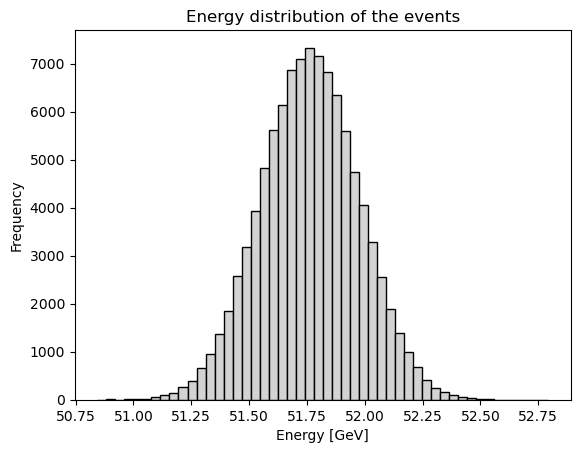

In [22]:
plt.figure()
plt.title('Energy distribution of the events')
plt.hist(np.sort(E_lab), bins = 50, color = 'lightgray', edgecolor = 'black')
plt.xlabel('Energy [GeV]')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Starting from this energy distribution, we will compute the scattering angle distribution,
# the momentum distribution and the boosted momentum distribution.
# Keep in mind that the energy here referes to the LAB frame

def generateTheta_normal(E_lab: np.array, discarded_events) -> Tuple[(np.array, int)]:
    '''
    This function generates a scattering angle distribution taking into account the normally-distributed
    beam.
    Parameters:
    * E_lab: an array containing all the energies. These energies are normally distributed according to parameters
             defined outside of this function
    '''
    theta = np.linspace(0, pi, 100)
    out = []
    
    for energy in E_lab:
        E_CM = np.sqrt(2 * m_e * (energy * 1000) + 2 * e2)    # (energy * 1000) is because energy is in GeV and E_CM is computed in MeV
        if 1 - 4 * e2 / (E_CM ** 2) <= 0 or 1 - 4 * mu2 / (E_CM ** 2) < 0:
            discarded_events += 1
        else:
            CDF = cumulative_distr(E_CM, theta)
            predictor = interp1d(CDF, theta, kind = 'linear')
            out.append(float(predictor(np.random.uniform(min(CDF), max(CDF)))))
    out = np.array(out)
    return out, discarded_events

simul2, discarded_events = generateTheta_normal(E_lab, discarded_events)

In [24]:
print('Total number of discarded events: {}'.format(discarded_events))
print('Fraction of discarded events: {}%'.format(discarded_events/1e5 * 100))

Total number of discarded events: 0
Fraction of discarded events: 0.0%


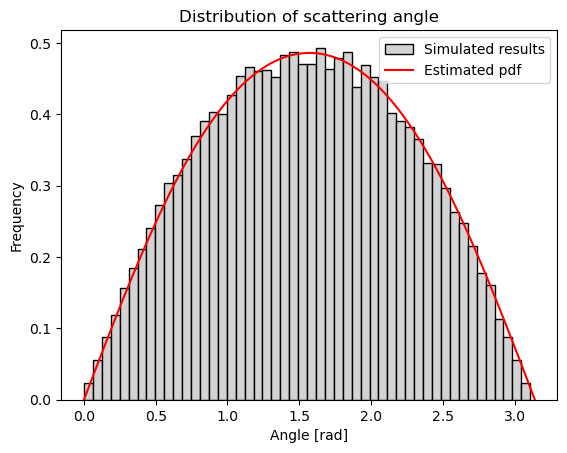

In [25]:
# Let's plot these results as well
plt.figure()
plt.title('Distribution of scattering angle')
plt.hist(np.sort(simul2), bins = 50, color = 'lightgray', label = 'Simulated results', density = True, 
         edgecolor = 'black')
plt.plot(theta_domain, probs, color = 'red', label = 'Estimated pdf')
plt.xlabel('Angle [rad]')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()

Text(0, 0.5, 'Frequency')

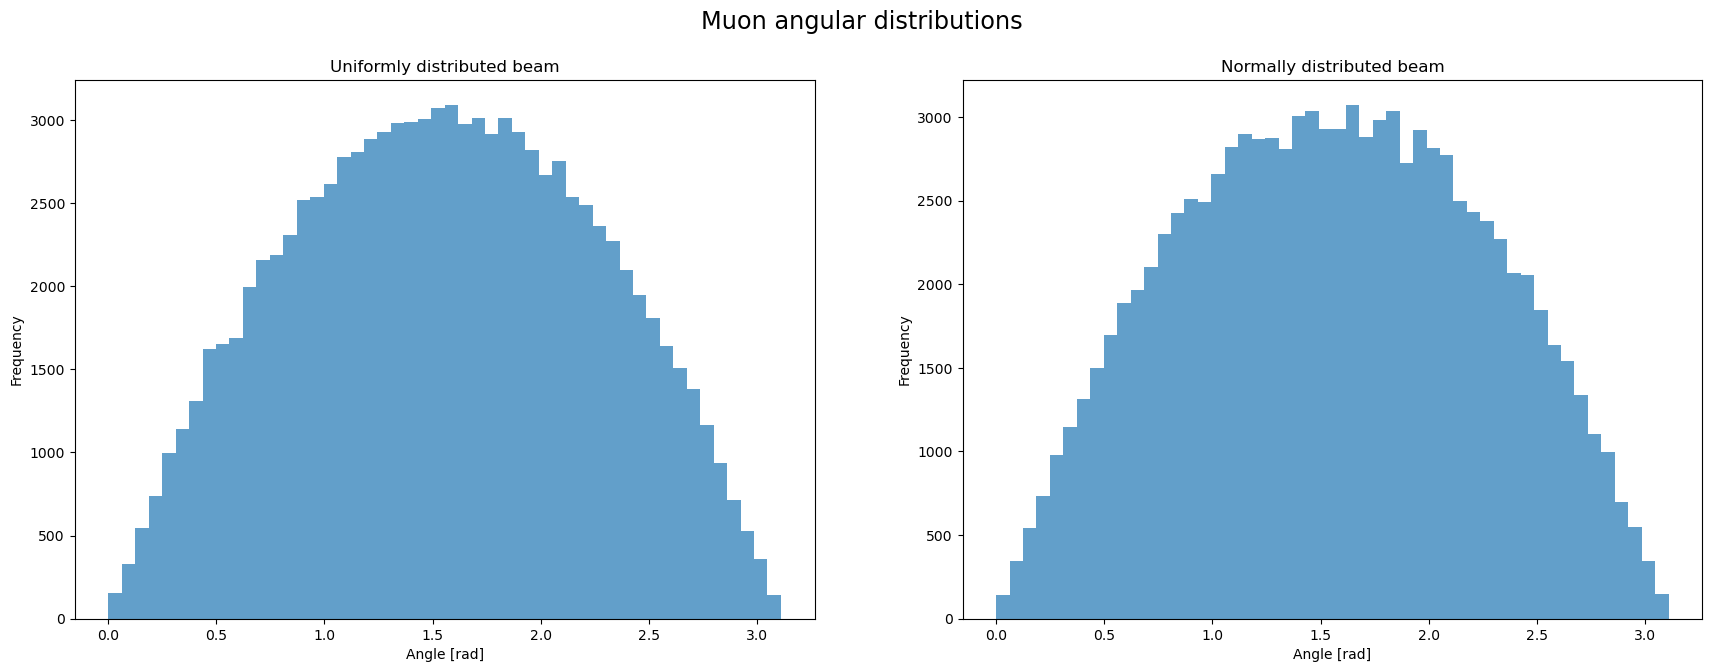

In [26]:
# Let's plot both distributions side by side and see how they compare
fig, ax = plt.subplots(1, 2, figsize = (21, 7))
fig.suptitle('Muon angular distributions', size = 'xx-large')

ax[0].hist(np.sort(simul1), bins = 50, alpha = .7)
ax[0].set_title('Uniformly distributed beam')
ax[0].set_xlabel('Angle [rad]')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(simul2), bins = 50, alpha = .7)
ax[1].set_title('Normally distributed beam')
ax[1].set_xlabel('Angle [rad]')
ax[1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

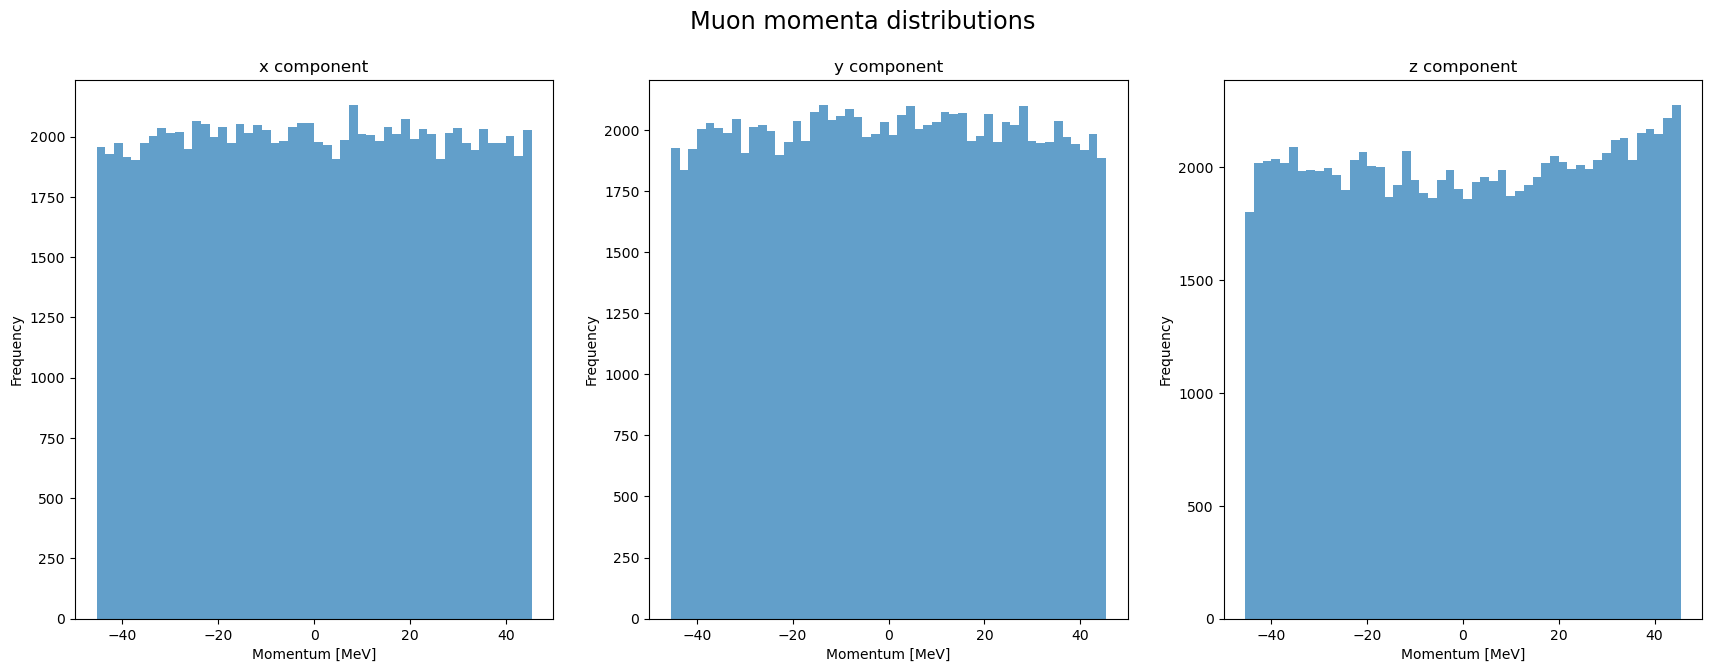

In [27]:
# Let's now see how momenta compare
# In the CoM frame
ECM = E_lab / gamma * 1000
momentum_CM = np.sqrt((ECM / 2) ** 2 - (m_mu**2))

N = int(1e5)
phi_values = np.random.uniform(0, 2 * pi, N)
theta_values = simul2

p_x = momentum * np.sin(theta_values) * np.cos(phi_values)
p_y = momentum * np.sin(theta_values) * np.sin(phi_values)
p_z = momentum * np.cos(theta_values)

# Now, let's plot the three distributions
fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon momenta distributions', size = 'xx-large')

ax[0].hist(np.sort(p_x), bins = 50, alpha = .7)
ax[0].set_title('x component')
ax[0].set_xlabel('Momentum [MeV]')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(p_y), bins = 50, alpha = .7)
ax[1].set_title('y component')
ax[1].set_xlabel('Momentum [MeV]')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(p_z), bins = 50, alpha = .7)
ax[2].set_title('z component')
ax[2].set_xlabel('Momentum [MeV]')
ax[2].set_ylabel('Frequency')

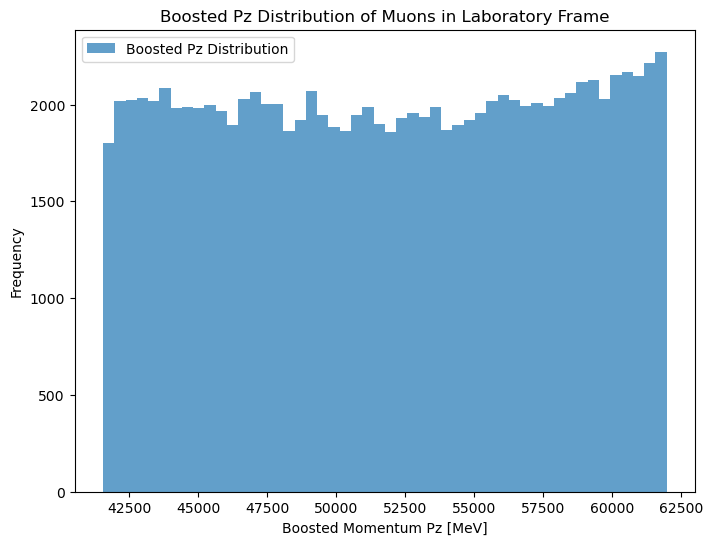

(225.0493861093061, 0.9999901277423128)

In [28]:
# And let's now perform a Lorentz transform
gamma = fix_E / (2 * m_e)
# Technically speaking, each event has its own gamma. This however is a very fine correction (?)
E_muons_cm = np.sqrt(momentum**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

E_prime = []
p_x_prime = []
p_y_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, px, py, pz, v = lorentz_boost(fix_E, p_x[i], p_y[i], p_z[i], gamma)
    E_prime.append(E)
    p_x_prime.append(px)
    p_y_prime.append(py)
    p_z_prime.append(pz)
    
E_prime = np.array(E_prime)
p_x_prime = np.array(p_x_prime)
p_y_prime = np.array(p_y_prime)
p_z_prime = np.array(p_z_prime)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz [MeV]')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()

# The other two components of the momentum remain the same
gamma, v

## 8. Given that the electrons traversing the target lose energy as $E(z)=E_0 \exp{-z/X_0}$ (with z the longitudinal coordinate of the target, the one parallel to the beam direction and $X_0$ is the Beryllium radiation length), compute the nominal beam energy $E_0$ such that muon pairs can be generated along the whole length of the target;


One extremely important effect we have been, so far, neglecting is the energy loss that the beam undergoes while traveling through the target. Defining $z$ as the longitudinal coordinate, the energy loss can be parametrized as: 
$$
E(z) = E_0 e^{-z/X_0}
$$

Where $E_0$ is the initial energy of the beam and $X_0$ is the radiation length of the target's material. <br>
As previously mentioned, this aspect is of the utmost importance, since there exists a threshold energy below which the beam cannot produce muon/antimuon pairs. This threshold energy can be calculated and it results equal to:
$$
E_{threshold} = \frac{4m_{\mu}^2 - 2m_e^2}{2m_e}
$$

Therefore, we can replace, in the energy loss expression, $E(t)$ with $E_{threshold}$ and multiply both terms times $e^{t/X_0} $ (where $t$ is the target thickness) in order to obtain the minimum energy required in order to produce muon/antimuon pairs all along the whole length of the target:

$$
E_{min} = E_{threshold} e^{t/X_0}
$$

As already mentioned, this aspect is of paramount importance. For example, if the starting energy of the beam is such that we produce events only for 2.5 cm in the target, then we would have to change the rescaling factor accordingly (by changing $t$ into $t' = 2.5$ cm)

In [29]:
X0 = 35.28        # Radiation length of Beryllium, [cm]
thickness = 3     # Thickness of the Beryllium target, [cm]

# E_threshold is the minimum energy required in order to have the production of pairs mu/antimu
E_threshold = ((4 * mu2) - (2 * e2)) / (2 * m_e)
print('Threshold energy for the process: {} GeV'.format(E_threshold / 1000))

# E_0 is the minimum energy required in order to produce mu/antimu pairs all over the Beryllium target
E_0 = E_threshold * np.exp(thickness / X0)
print('Minimum energy required in order to produce mu/antimu pairs along the whole length of the target: {} GeV'.format(E_0 / 1000))

Threshold energy for the process: 43.693090771852084 GeV
Minimum energy required in order to produce mu/antimu pairs along the whole length of the target: 47.57103165490111 GeV


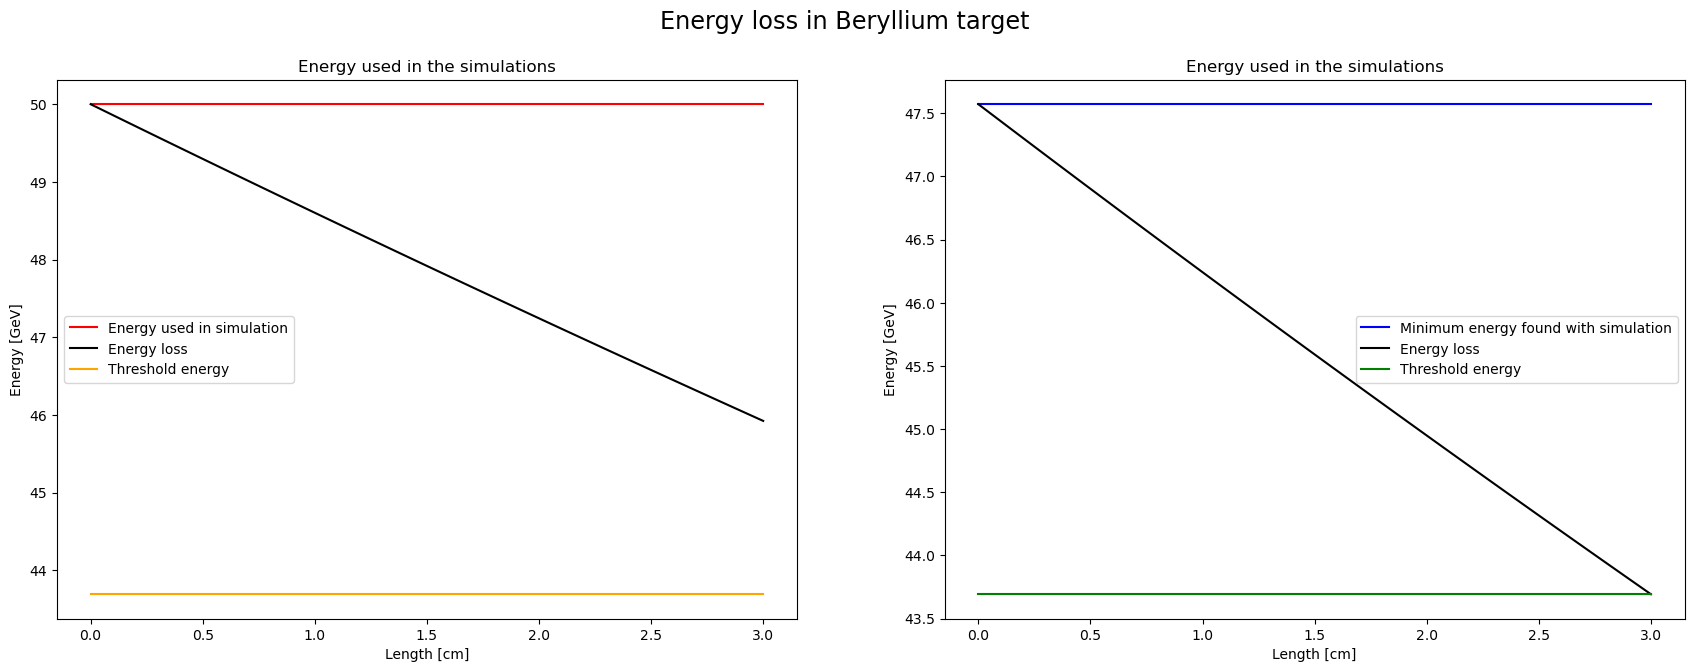

In [30]:
# Notice how we have been working at around 50 GeV, slightly above the minimum required energy.

# Let's plot the energy loss in the Beryllium target for 50 GeV and for E_0
target = np.linspace(0, 3, 100)
def energy_loss(E0: float, X: np.array, X0: float) -> np.array:
    energy = np.zeros(len(X))
    for i in range(len(X)):
        energy[i] = E0 * np.exp(- X[i]/X0)
    return energy
loss_E_lab = energy_loss(50, target, X0)
loss_E_0 = energy_loss(E_0, target, X0)

fig, ax = plt.subplots(1, 2, figsize = (21, 7))
fig.suptitle('Energy loss in Beryllium target', size = 'xx-large')

ax[0].plot(target, 50 * np.ones(100), color = 'red', label = 'Energy used in simulation')
ax[0].plot(target, loss_E_lab, color = 'black', label = 'Energy loss')
ax[0].plot(target, E_threshold * np.ones(100) / 1000, color = 'orange', label = 'Threshold energy')
ax[0].set_title('Energy used in the simulations')
ax[0].set_xlabel('Length [cm]')
ax[0].set_ylabel('Energy [GeV]')
ax[0].legend(loc = 'best')

ax[1].plot(target, E_0 * np.ones(100) / 1000, color = 'blue', label = 'Minimum energy found with simulation')
ax[1].plot(target, loss_E_0 / 1000, color = 'black', label = 'Energy loss')
ax[1].plot(target, E_threshold * np.ones(100) / 1000, color = 'green', label = 'Threshold energy')
ax[1].set_title('Energy used in the simulations')
ax[1].set_xlabel('Length [cm]')
ax[1].set_ylabel('Energy [GeV]')
ax[1].legend(loc = 'best')

A linear behavior for the energy loss for low values of the thickness is to be expected when we take into account the Maclaurin expansion of the exponential function:
$$
e^{-z} = \sum_{n = 0}^{\infty} \frac{z^n}{n!} = 1 - z + \mathcal{O}(z^2)
$$

Nevertheless, we can also plot the energy loss in a target which is much thicker than the one actually used in the experiment. In this case, we simulated a target whose thickness is $10X_0$.

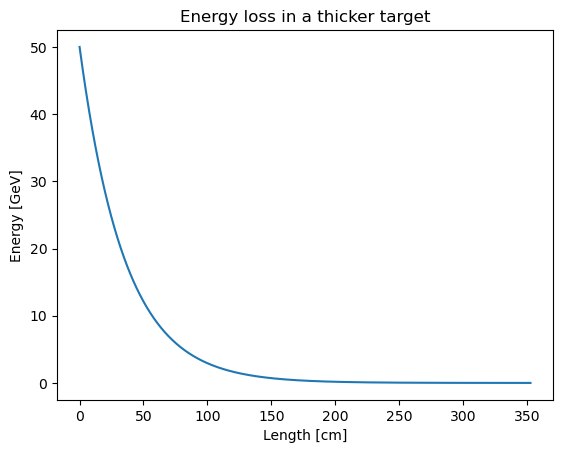

In [31]:
# One might be worried about the seemingly linear energy loss curves, so let's plot the energy loss
# of a beam with energy 50 GeV in a Beryllium target whose thickness is 10 times the radiation length

thickness_new = 10 * X0

plt.figure()
plt.title('Energy loss in a thicker target')
plt.plot(np.linspace(0, thickness_new, 1000), energy_loss(50, np.linspace(0, thickness_new, 1000), X0))
plt.xlabel('Length [cm]')
plt.ylabel('Energy [GeV]')
plt.show()

## 9. (optional) Take the former point into account when generating the events (i.e. the proccess $\sqrt{s}$ depend on the position along the target where the $e^+ - e^-$ scattering occurrs.


In [33]:
# Now we consider the energy of the beam to be distributed according a normal distribution and we also take into
# account the energy loss in the target.

X0 = 35.28           # Radiation lenght of Beryllium, [cm]
thickness = 3        # Thickness of the target, [cm]

E_lab = 52           # Nominal energy of the beam in the laboratory frame, [GeV]
N_points = 1000      # Number of points of the Beryllium target used for the simulation
N_events = int(1e5)  # Number of events in the simulation
target = np.linspace(0, thickness, N_points)    # Beryllium target. Coordinate expressed in [cm]
events_per_point = int(N_events/N_points)    # Number of events for each point of the target. Has to be an integer
discarded_events = 0    # This variable keeps track of how many events we might end up having to discard due to computational issues. If the number it too high, we might want to increase the beam energy

E_loss = energy_loss(E_lab, target, X0)

In [34]:
# The procedure is similar as the one we've done before, but now we take into account the
# loss of the energy of the beam (ie: the energy loss affects the NOMINAL energy of the beam).
# Probably there are also some variations in the standard deviation of the beam energy (we assume that
# it might get larger?), but we didn't know how to handle them so we ignored them.

Energies = []      # This array contains all the values of the energy. It is useful to stay consistent
simul3 = []        # This array contains all the simulated scattering angles.
for i in range(len(target)):
    E_center = E_loss[i]
    E_distr = np.random.normal(E_center, STD, events_per_point)
    for E in E_distr:
        Energies.append(E)
    theta_batch, discarded_events = generateTheta_normal(E_distr, discarded_events)
    for theta in theta_batch:
        simul3.append(theta)

simul3 = np.array(simul3)
Energies = np.array(Energies)

In [35]:
print('Total number of discarded events: {}'.format(discarded_events))
print('Fraction of discarded events: {}%'.format(discarded_events/1e5 * 100))

Total number of discarded events: 0
Fraction of discarded events: 0.0%


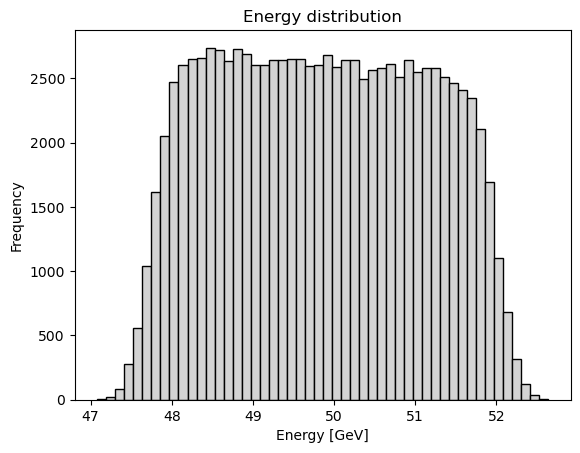

In [36]:
plt.figure()
plt.title('Energy distribution')
plt.hist(np.sort(Energies), bins = 50, color = 'lightgray', edgecolor = 'black')
plt.xlabel('Energy [GeV]')
plt.ylabel('Frequency')
plt.show()

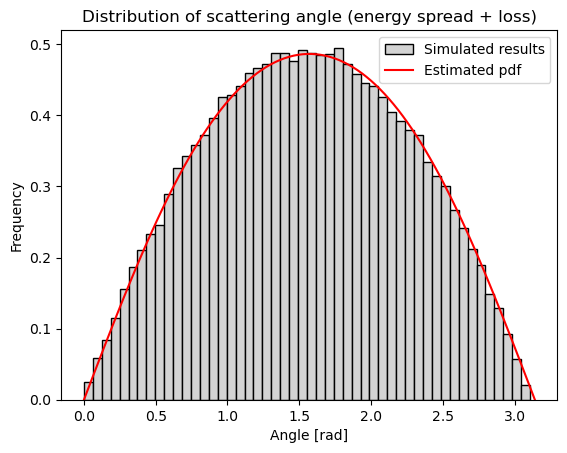

In [37]:
plt.figure()
plt.title('Distribution of scattering angle (energy spread + loss)')
plt.hist(np.sort(simul3), bins = 50, color = 'lightgray', label = 'Simulated results', density = True, 
         edgecolor = 'black')
plt.plot(theta_domain, probs, color = 'red', label = 'Estimated pdf')
plt.xlabel('Angle [rad]')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.show()

Text(0, 0.5, 'Frequency')

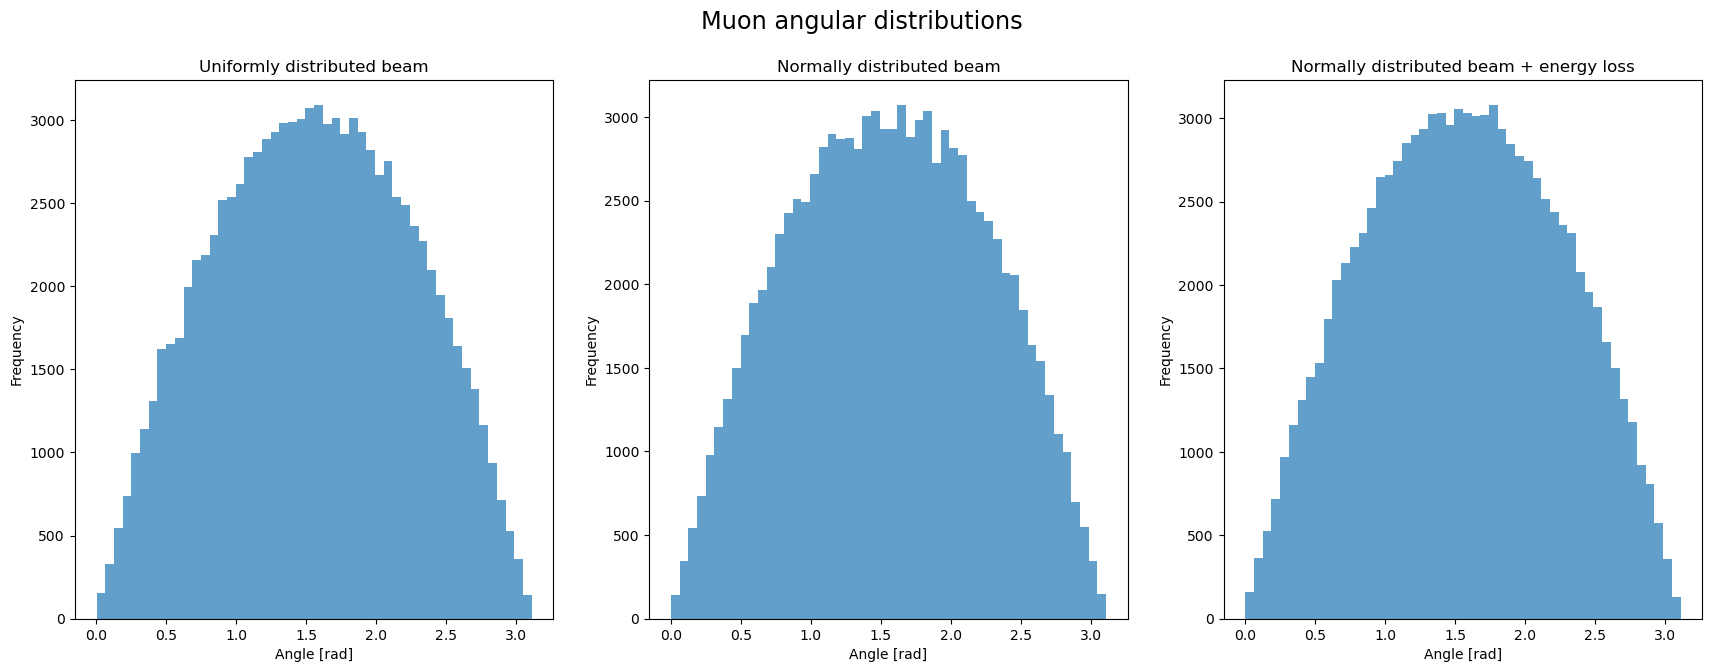

In [38]:
fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon angular distributions', size = 'xx-large')

ax[0].hist(np.sort(simul1), bins = 50, alpha = .7)
ax[0].set_title('Uniformly distributed beam')
ax[0].set_xlabel('Angle [rad]')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(simul2), bins = 50, alpha = .7)
ax[1].set_title('Normally distributed beam')
ax[1].set_xlabel('Angle [rad]')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(simul3), bins = 50, alpha = .7)
ax[2].set_title('Normally distributed beam + energy loss')
ax[2].set_xlabel('Angle [rad]')
ax[2].set_ylabel('Frequency')

/var/folders/4b/mll9pp3904zgqgnvx5995dtc0000gn/T/ipykernel_1152/795264229.py:4: RuntimeWarning: invalid value encountered in sqrt
  momentum_CM = np.sqrt((ECM / 2) ** 2 - (m_mu**2))


Text(0, 0.5, 'Frequency')

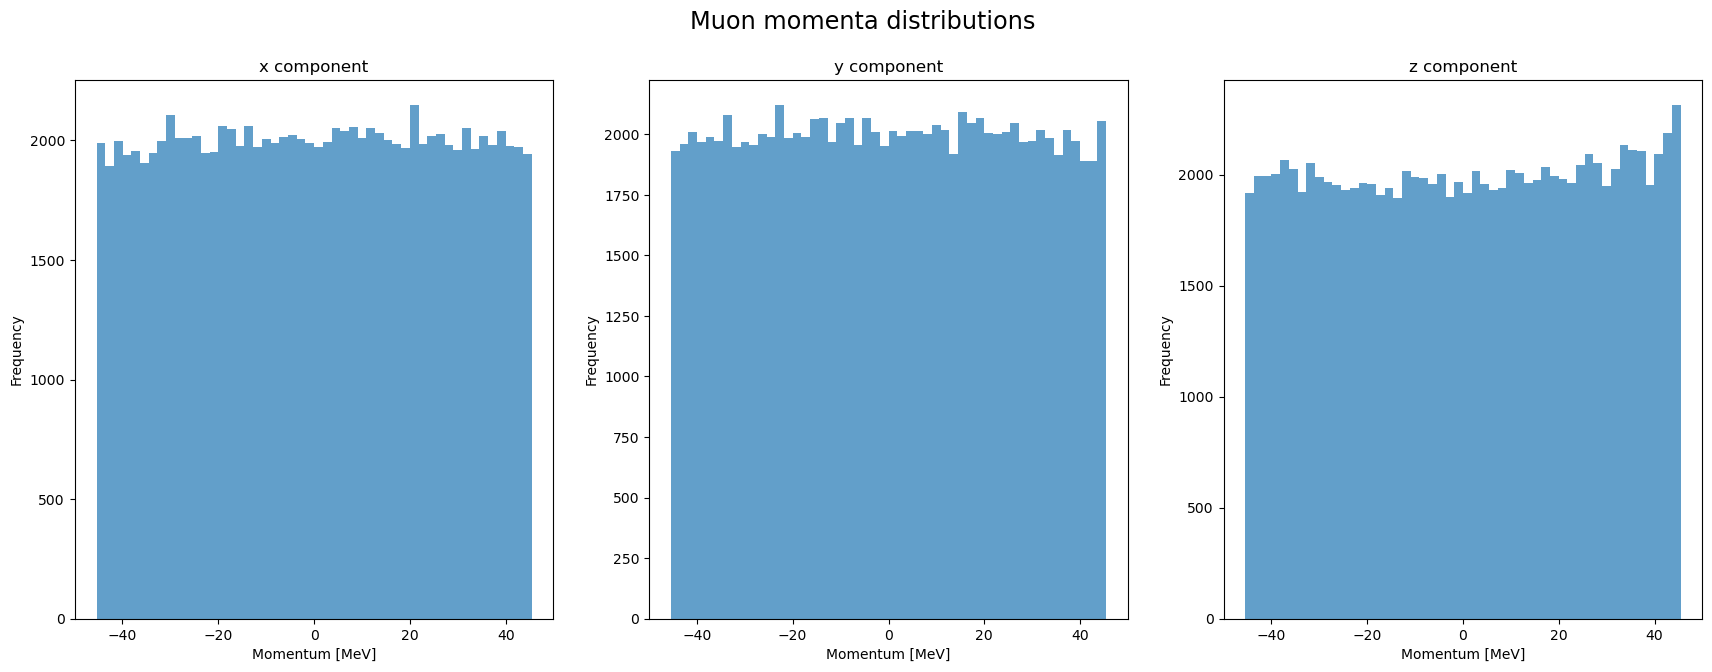

In [39]:
# Finally, let's compute the momentum components distributions

ECM = Energies / gamma * 1000
momentum_CM = np.sqrt((ECM / 2) ** 2 - (m_mu**2))

N = len(Energies)
phi_values = np.random.uniform(0, 2 * pi, N)
theta_values = simul3

p_x = momentum * np.sin(theta_values) * np.cos(phi_values)
p_y = momentum * np.sin(theta_values) * np.sin(phi_values)
p_z = momentum * np.cos(theta_values)

fig, ax = plt.subplots(1, 3, figsize = (21, 7))
fig.suptitle('Muon momenta distributions', size = 'xx-large')

ax[0].hist(np.sort(p_x), bins = 50, alpha = .7)
ax[0].set_title('x component')
ax[0].set_xlabel('Momentum [MeV]')
ax[0].set_ylabel('Frequency')

ax[1].hist(np.sort(p_y), bins = 50, alpha = .7)
ax[1].set_title('y component')
ax[1].set_xlabel('Momentum [MeV]')
ax[1].set_ylabel('Frequency')

ax[2].hist(np.sort(p_z), bins = 50, alpha = .7)
ax[2].set_title('z component')
ax[2].set_xlabel('Momentum [MeV]')
ax[2].set_ylabel('Frequency')

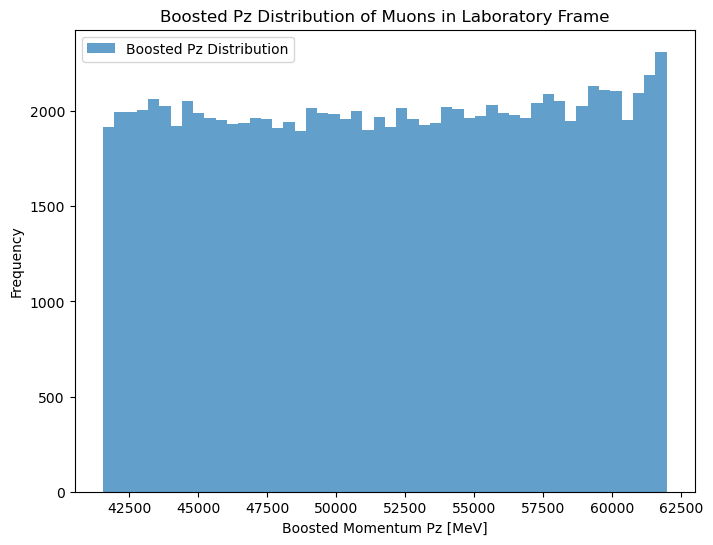

In [40]:
E_muons_cm = np.sqrt(momentum**2 + m_mu**2)
p_muons_cm = [p_x, p_y, p_z]

E_prime = []
p_x_prime = []
p_y_prime = []
p_z_prime = []

for i in range(len(p_x)):
    E, px, py, pz, v = lorentz_boost(fix_E, p_x[i], p_y[i], p_z[i], gamma)
    E_prime.append(E)
    p_x_prime.append(px)
    p_y_prime.append(py)
    p_z_prime.append(pz)
    
E_prime = np.array(E_prime)
p_x_prime = np.array(p_x_prime)
p_y_prime = np.array(p_y_prime)
p_z_prime = np.array(p_z_prime)

# Plotting the boosted Pz distribution
plt.figure(figsize=(8, 6))
plt.hist(p_z_prime, bins=50, alpha=0.7, label='Boosted Pz Distribution')
plt.xlabel('Boosted Momentum Pz [MeV]')
plt.ylabel('Frequency')
plt.title('Boosted Pz Distribution of Muons in Laboratory Frame')
plt.legend()
plt.show()